# Multiple Linear Regression Model

In [22]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

### Importing all stock market data

In [2]:
aord = pd.read_csv('ALLOrdinary.csv', index_col='Date')
nikkei = pd.read_csv('Nikkei225.csv', index_col='Date')
hsi = pd.read_csv('HSI.csv', index_col='Date')
daxi = pd.read_csv('DAXI.csv', index_col='Date')
cac40 = pd.read_csv('CAC40.csv', index_col='Date')
sp500 = pd.read_csv('SP500.csv', index_col='Date')
nasdaq = pd.read_csv('nasdaq_composite.csv', index_col='Date')
dji = pd.read_csv('DJI.csv', index_col='Date')
spy = pd.read_csv('SPY.csv', index_col='Date')

In [3]:
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,2653.909912,2661.500000,2597.810059,2609.629883,2609.629883,2076690000
2008-01-03,2611.959961,2624.270020,2592.179932,2602.679932,2602.679932,1970200000
2008-01-04,2571.080078,2571.080078,2502.679932,2504.649902,2504.649902,2516310000
2008-01-07,2514.149902,2521.620117,2471.229980,2499.459961,2499.459961,2600100000
2008-01-08,2506.969971,2527.419922,2440.510010,2440.510010,2440.510010,2566480000


## Data Munging

In [4]:
indicepanel = pd.DataFrame(index=spy.index)

In [5]:
indicepanel['spy_lag'] = spy['Open'] - spy['Open'].shift(1)
indicepanel['spy'] = indicepanel['spy_lag'].shift(-1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)
indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)
indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [6]:
indicepanel.head()

,spy_lag,spy,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,NaN,-1.619995,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.619995,-1.570008,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.570008,-1.529998,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,-1.529998,0.270004,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,0.270004,-2.990006,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


In [7]:
indicepanel.columns

Index(['spy_lag', 'spy', 'sp500', 'nasdaq', 'dji', 'cac40', 'daxi', 'aord',
       'hsi', 'nikkei', 'Price'],
      dtype='object')

## Dealing with null values

In [8]:
# checking null values
indicepanel.isnull().sum()

spy_lag      1
spy          1
sp500        1
nasdaq       1
dji          1
cac40       30
daxi        53
aord       319
hsi        121
nikkei     145
Price        0
dtype: int64

 We can use method 'fillna()' from dataframe to forward filling the Nan values
 
 Then we can drop the reminding Nan values

In [9]:
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [10]:
indicepanel.isnull().sum()

spy_lag    0
spy        0
sp500      0
nasdaq     0
dji        0
cac40      0
daxi       0
aord       0
hsi        0
nikkei     0
Price      0
dtype: int64

In [46]:
indicepanel.head()

,spy_lag,spy,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-04,-1.570008,-1.529998,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,-464.320313,143.339996
2008-01-07,-1.529998,0.270004,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,0.270004,-2.990006,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002
2008-01-09,-2.990006,0.589997,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-12.900390,768.359375,234.450195,139.089996
2008-01-10,0.589997,1.100006,16.530029,8.270019,142.90039,9.140137,-40.120117,-100.200196,-195.560547,-158.209961,139.679993


In [11]:
indicepanel.to_csv('indicepanel.csv')

## Data Splitting

Equal split because stock data is more noisy compared to other static data

In [13]:
train = indicepanel.iloc[-2000:-1000, :]
test = indicepanel.iloc[-1000:, :]
print(train.shape, test.shape)

(1000, 11) (1000, 11)


## Explore the train data set

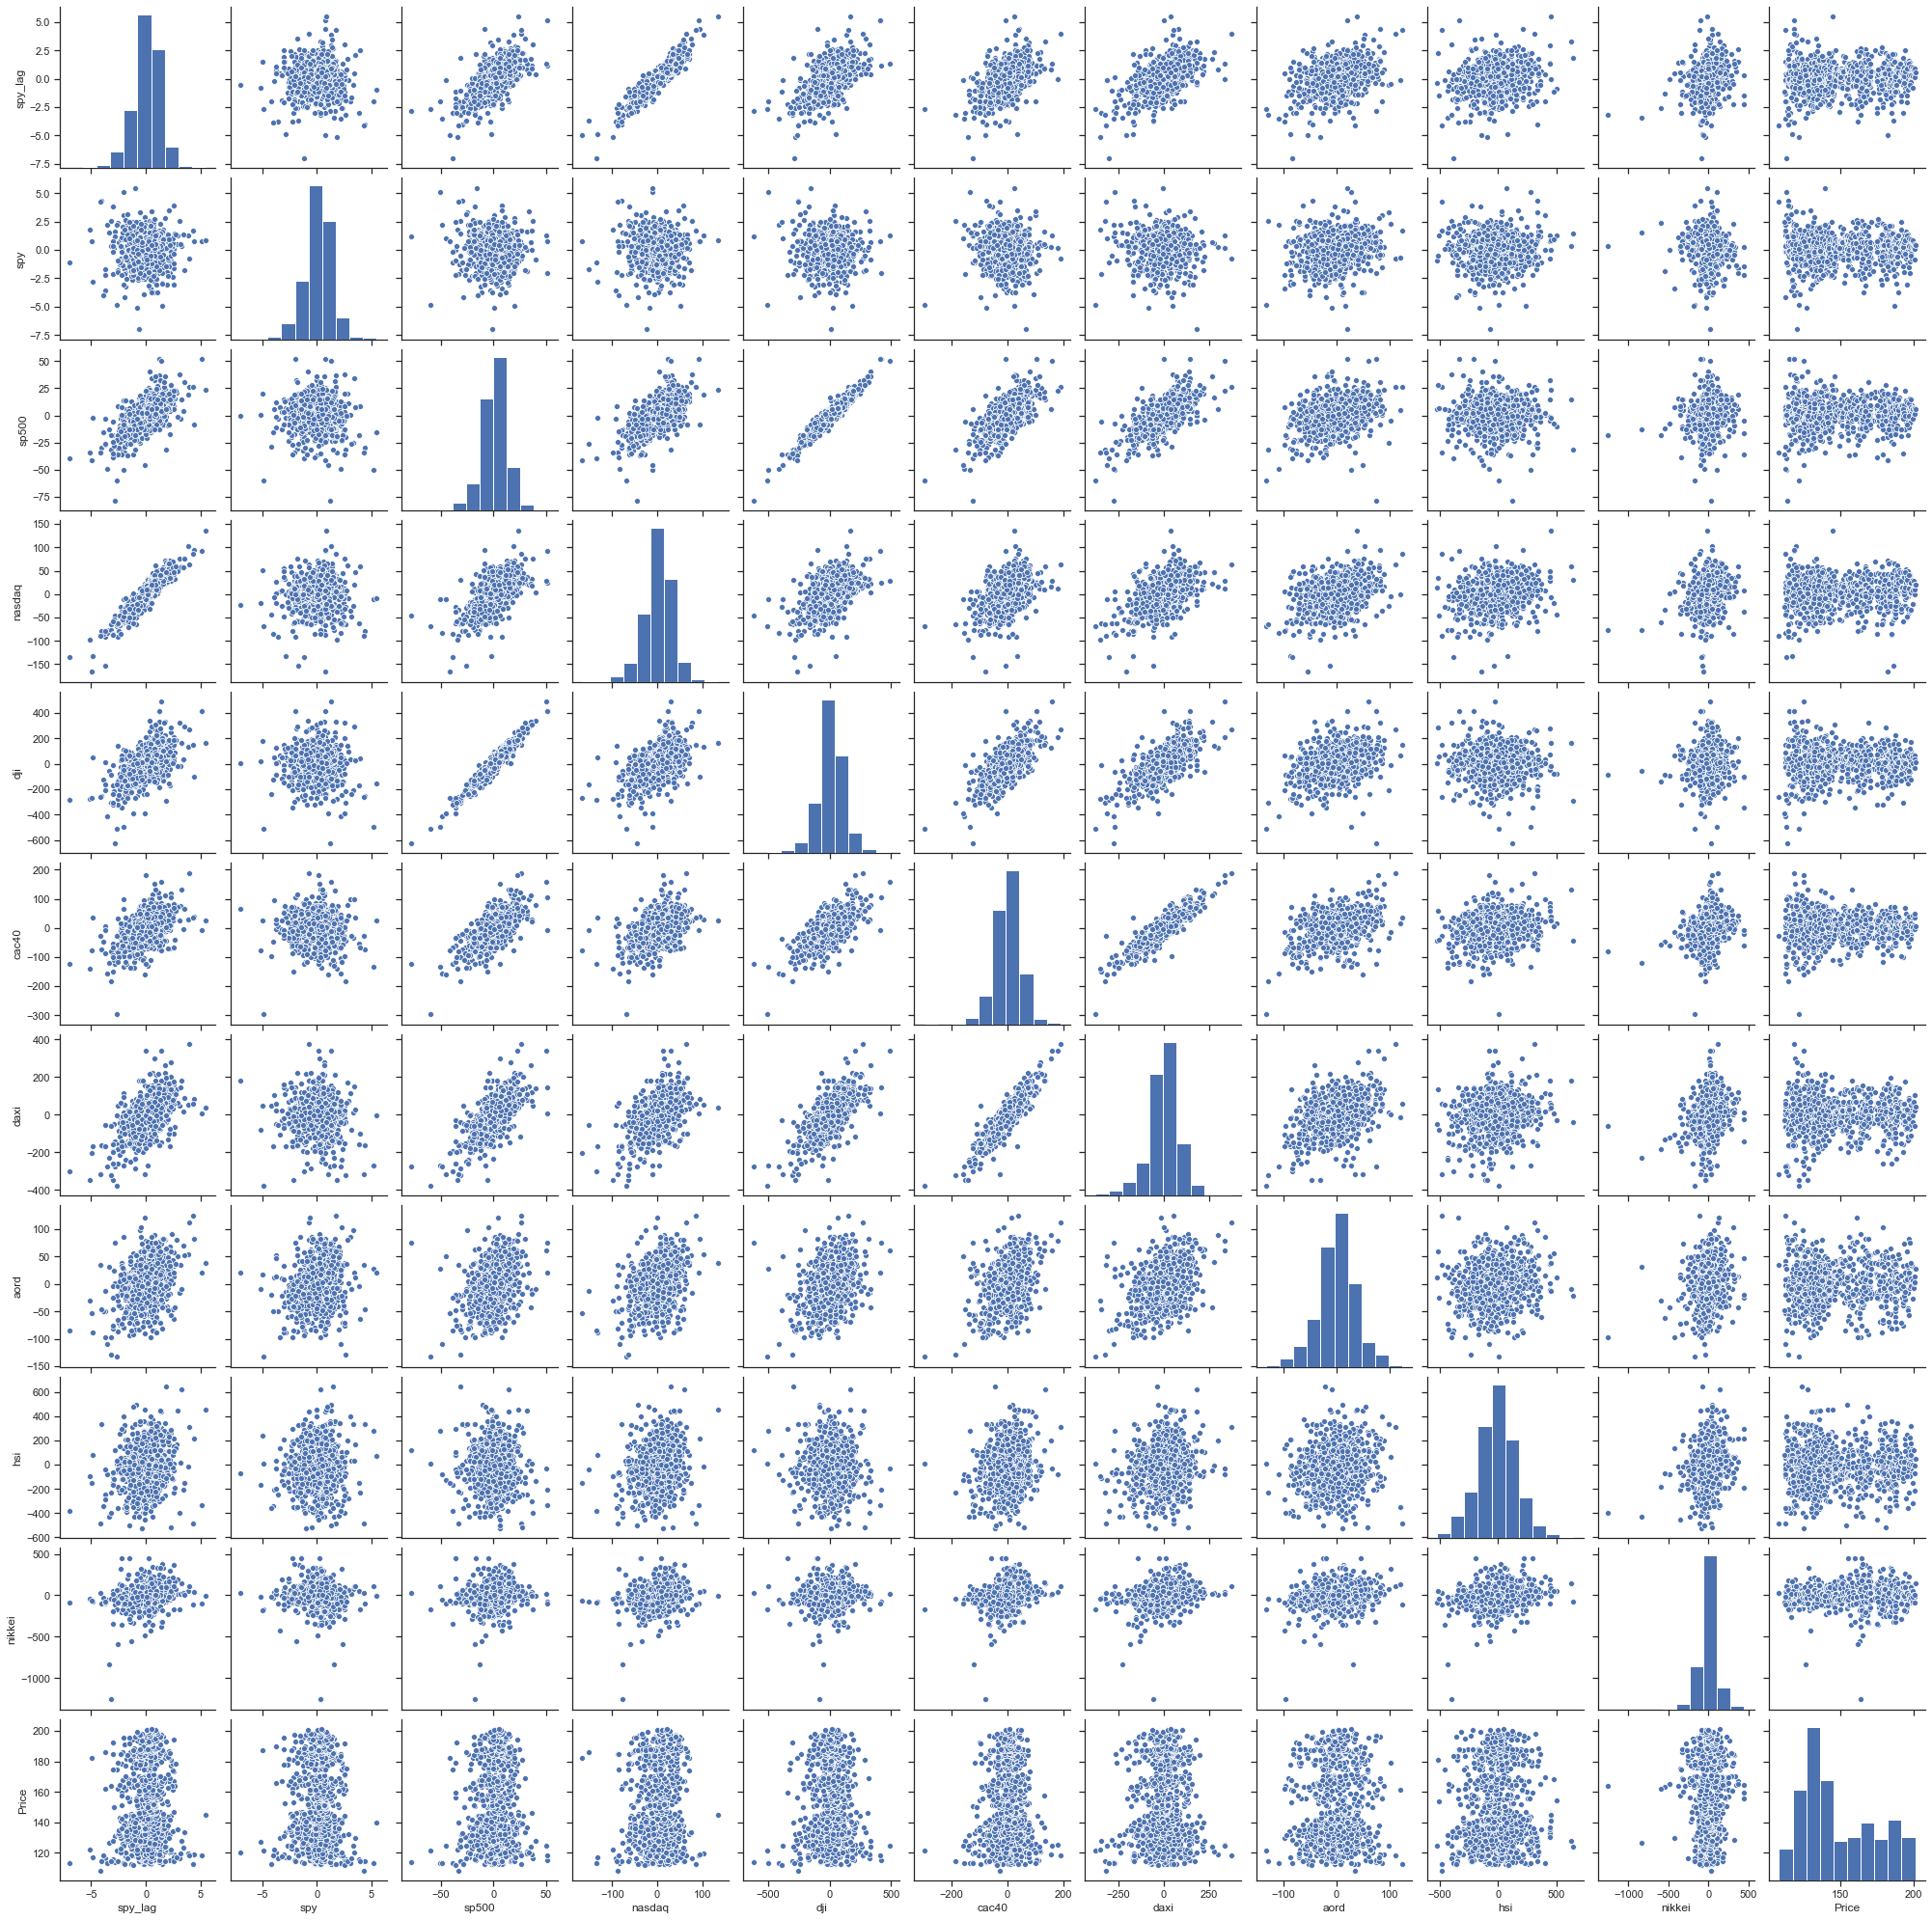

In [30]:
sns.pairplot(train)

If we check the scatterplots, which will response SPY with other nine predictors. We find that, there is no explicit pattern, which is evidence of high noisy properties of stock markets

## Check the correlation of each index between spy

We compute correlation in order to see the association clearly. From the output of correlation, we find that the predictors for Europe and Asian markets do have association with SPY, which have higher impacts than predictors of U.S. markets

In [38]:
print(train.corr()['spy'])

spy_lag   -0.011623
spy        1.000000
sp500     -0.018632
nasdaq     0.012333
dji       -0.037097
cac40     -0.055304
daxi      -0.069735
aord       0.179638
hsi        0.031400
nikkei    -0.035048
Price     -0.003222
Name: spy, dtype: float64


## Fitting

In [47]:
formula = 'spy~spy_lag+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.962
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.97e-11
Time:                        16:14:41   Log-Likelihood:                -1617.7
No. Observations:                1000   AIC:                             3255.
Df Residuals:                     990   BIC:                             3305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0836      0.039      2.138      0.033       0.007       0.160
spy_lag       -0.1567      0.091     -1.730      0.084      -0.335       0.021
sp500          0.0221      0.014      1.621      0.105      -0.005       0.049
nasdaq         0.0040      0.004      1.066      0.287      -0.003       0.011
dji           -0.0018      0.001     -1.248      0.212      -0.005       0.001
cac40         -0.0003      0.002     -0.153      0.879      -0.004       0.004
aord           0.0093      0.001      7.492      0.000       0.007       0.012
daxi          -0.0025      0.001     -2.387      0.017      -0.005      -0.000
nikkei        -0.0004      0.000     -1.264      0.207      -0.001       0.000
hsi            0.0003      0.000      1.222      0.222      -0.000       0.001
==============================================================================
Omnibus:                       91.018   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.687
Skew:                          -0.450   Prob(JB):                     7.45e-59
Kurtosis:                       5.369   Cond. No.                         405.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are a couple things we need to pay attention; the first thing is a p value for F-statistics. F test is for overall significance of the multiple linear equation model. If we reject, we accept alternative and it means that at least one of the predictors is useful. Our model is better fitted than intercept only model

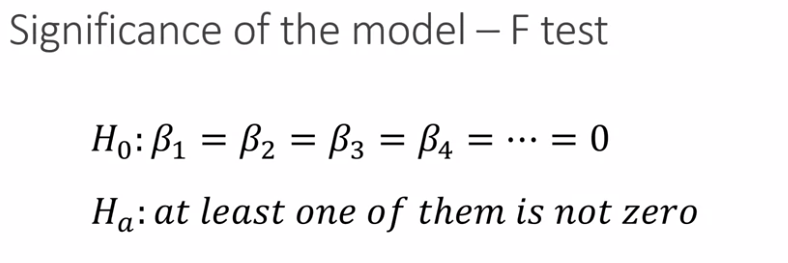

In [44]:
from IPython.display import Image
Image('Significance of F.PNG')

P value == 	Prob (F-statistic):	1.97e-11 < 0.05, Reject H0

It indicates that our model includes useful predictors

 Summary table also lists p value for the test test of significance for the individual predictors

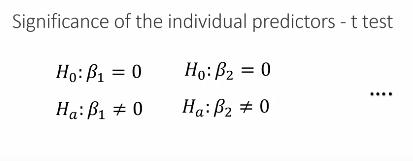

In [48]:
Image('P calue.PNG')

From Summary table we found that most predictors are not significant except Aord, that means all the all other predictors are useless information of SPY. It may be because of multicolinearity

Multicollinearity refers to a situation in which two or more predictors in the multiple regression model are highly, linearly related. One predictor can be predicted from the others with a substantial degree of accuracy and it is typical for our model since all indices of different markets are correlated. Multicollinearity does not reduce predictive power. In this situation, the coefficient estimates of the multiple equation may change erratically in response to small changes of data.

# Making Predictions

In [49]:
train['PredictedY'] = lm.predict(train)
test['PredictedY'] = lm.predict(test)

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
train.head()

,spy_lag,spy,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price,PredictedY
Date,,,,,,,,,,,,
2010-09-13,1.459999,-0.080002,8.810059,24.719971,43.58984,62.219970,72.289551,40.900390,261.449218,-3.819335,112.580002,0.333314
2010-09-14,-0.080002,-0.180000,7.780029,17.510010,86.13086,2.139893,3.270019,7.700196,-64.691406,-20.190430,112.500000,0.234375
2010-09-15,-0.180000,0.410003,-1.729980,1.859863,-18.31055,8.810058,20.740235,32.600097,-94.308594,-20.190430,112.320000,0.342496
2010-09-16,0.410003,0.309998,4.459961,14.340088,45.33008,-18.280029,-27.379883,-53.000000,-2.761719,-104.389648,112.730003,-0.281120
2010-09-17,0.309998,-0.160004,2.500000,20.909912,23.79981,20.330078,42.790039,27.399903,226.330078,44.439453,113.040001,0.323248


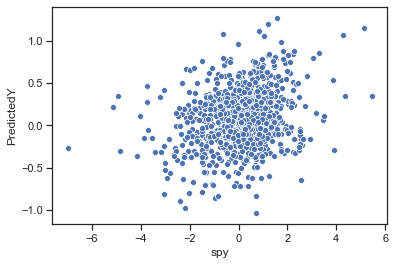

In [52]:
sns.scatterplot(train['spy'], train['PredictedY'])

It does have positive correlation although not very strog. Considering it's a daily change, this result is not bad

# Model Evaluation - Statistical Standard

We can measure the performance of our model using some statistical metrics - **RMSE**, **Adjusted $R^2$**

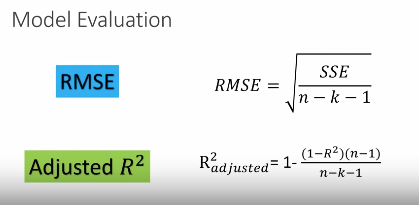

In [53]:
Image('model evaluation.PNG')

 First statistic is RMSE, which is the square root of sum of squared errors averaged by degrees of freedom, where k is number of predictors. This statistic is to measure the prediction error. The reason to use the degrees of freedom is that, square of RMSE is unbiased estimator of variance of the noise. The second is adjusted R-square. In Simple Linear Regression, we use R-square to get the percentage of variation that can be explained by a model. We found that by adding more predictors, the askew is always increasing, but the accuracy is even worse. To compensate the effects of numbers predictors, we have adjusted R-square, which measures percentage of variation of a response that is explained by the model

In [65]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [67]:
# Get the assement table fo our model
assessTable(test, train, lm, 9, 'spy')

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Train,Test
R2,0.059020,0.067248
RMSE,1.226068,1.701291


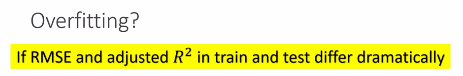

In [68]:
Image('overfitting.PNG')

We compute RMSE and adjust R-square in both train and test in order to check whether they are different dramatically. If so, this is called overfitting. Usually, for overfitting model, RMSE and adjusted R-square is much better in train than in test dataset. That it implies that we cannot apply this model to real market in future. From output our model, RMSE increases in test, which is a bit worse than that in the train. I just ask where the test is batter. Overall, our model is not overfitted.